<a href="https://colab.research.google.com/github/i-malur/DataScience_estilizacao_de_tabelas_com_python/blob/main/Estilizacao_de_tabelas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coleta e preparação de dados

In [ ]:
!pip install pandas==2.2.3

In [ ]:
import pandas as pd

Dados do csv relatorio_vendas

data_pedido: data em que o cliente realizou o pedido do produto.  
modo_envio: modo de envio do produto especificado pelo cliente.  
nome_cliente: nome do cliente.  
segmento_cliente: o segmento a que pertence o cliente, podendo ser B2B ou B2C.  
cidade: cidade de destino do pedido.  
estado: estado de destino do pedido.  
regiao: região do estado de destino do pedido.  
departamento: departamento do produto encomendado.  
tipo_produto: categoria do produto encomendado.  
vendas: valor ganho de venda do produto.  
quantidade: quantidade pedida do produto encomendado.  
desconto: desconto fornecido na compra.  
lucro: valor de lucro/perda para a empresa considerando os gastos com o produto.  

In [ ]:
dados = pd.read_csv('/content/relatorio_vendas.csv')
dados

,data_pedido,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,vendas,quantidade,lucro
0,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,890.66,2,142.51
1,2018-11-09,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,2488.60,3,746.58
2,2018-06-13,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,49.71,2,23.36
3,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,3255.76,5,-1302.31
4,2017-10-12,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,76.05,2,8.56
...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,123.22,1,51.75
8936,2019-11-18,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,271.97,1,97.91
8937,2019-11-18,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,700.74,5,189.20
8938,2016-01-22,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,85.84,3,13.95


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_pedido       8940 non-null   object 
 1   modo_envio        8940 non-null   object 
 2   nome_cliente      8940 non-null   object 
 3   segmento_cliente  8940 non-null   object 
 4   cidade            8940 non-null   object 
 5   estado            8940 non-null   object 
 6   regiao            8940 non-null   object 
 7   departamento      8940 non-null   object 
 8   tipo_produto      8940 non-null   object 
 9   vendas            8940 non-null   float64
 10  quantidade        8940 non-null   int64  
 11  lucro             8940 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 838.3+ KB


In [ ]:
dados['data_pedido'] = pd.to_datetime(dados['data_pedido'])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_pedido       8940 non-null   datetime64[ns]
 1   modo_envio        8940 non-null   object        
 2   nome_cliente      8940 non-null   object        
 3   segmento_cliente  8940 non-null   object        
 4   cidade            8940 non-null   object        
 5   estado            8940 non-null   object        
 6   regiao            8940 non-null   object        
 7   departamento      8940 non-null   object        
 8   tipo_produto      8940 non-null   object        
 9   vendas            8940 non-null   float64       
 10  quantidade        8940 non-null   int64         
 11  lucro             8940 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 838.3+ KB


# Missão 1: Time de vendas

Precisamos construir uma visualização para indicar os **10 maiores clientes por total de venda**.

Com isso, a equipe de vendas pode pensar em estratégias para manter esses clientes comprando em nossa loja.

In [ ]:
dados_clientes_vendas = dados.groupby('nome_cliente')['vendas'].sum().nlargest(10).copy()
dados_clientes_vendas = dados_clientes_vendas.reset_index()
dados_clientes_vendas

,nome_cliente,vendas
0,Maria Luiza Almeida,64777.54
1,Ana Julia Pinto,51398.95
2,Ryan Farias,48178.94
3,Heitor da Mata,47610.85
4,Maria Clara Gonçalves,46946.42
5,Raquel Freitas,44826.26
6,Davi Ramos,43769.21
7,Amanda Melo,42354.27
8,Alexia Ribeiro,41238.84
9,Calebe Ribeiro,41056.70


In [ ]:
dados_clientes_vendas.columns = ['Clientes', 'Vendas']
dados_clientes_vendas['Ranque'] = dados_clientes_vendas.index + 1
dados_clientes_vendas.set_index('Ranque', inplace=True)
dados_clientes_vendas

,Clientes,Vendas
Ranque,,
1,Maria Luiza Almeida,64777.54
2,Ana Julia Pinto,51398.95
3,Ryan Farias,48178.94
4,Heitor da Mata,47610.85
5,Maria Clara Gonçalves,46946.42
6,Raquel Freitas,44826.26
7,Davi Ramos,43769.21
8,Amanda Melo,42354.27
9,Alexia Ribeiro,41238.84


In [ ]:
s_cliente = dados_clientes_vendas.style
s_cliente

,Clientes,Vendas
Ranque,,
1,Maria Luiza Almeida,64777.540000
2,Ana Julia Pinto,51398.950000
3,Ryan Farias,48178.940000
4,Heitor da Mata,47610.850000
5,Maria Clara Gonçalves,46946.420000
6,Raquel Freitas,44826.260000
7,Davi Ramos,43769.210000
8,Amanda Melo,42354.270000
9,Alexia Ribeiro,41238.840000


In [ ]:
s_cliente.format({'Vendas':'R$ {:,.2f}'})
s_cliente

,Clientes,Vendas
Ranque,,
1,Maria Luiza Almeida,"R$ 64,777.54"
2,Ana Julia Pinto,"R$ 51,398.95"
3,Ryan Farias,"R$ 48,178.94"
4,Heitor da Mata,"R$ 47,610.85"
5,Maria Clara Gonçalves,"R$ 46,946.42"
6,Raquel Freitas,"R$ 44,826.26"
7,Davi Ramos,"R$ 43,769.21"
8,Amanda Melo,"R$ 42,354.27"
9,Alexia Ribeiro,"R$ 41,238.84"


# Missão 2: Time comercial

Precisamos construir uma visualização que permita associar o **total ganho em vendas e o total lucrado por tipo de produto**.

Isso vai permitir que o time comercial possa focar em estratégias para alavancar as rendas que ganham com cada tipo de produto vendido na loja.

In [ ]:
dados_vendas_lucro = dados.groupby('tipo_produto')[['vendas', 'lucro']].sum()
dados_vendas_lucro.index.name = 'Tipo de Produto'
dados_vendas_lucro

,vendas,lucro
Tipo de Produto,,
decoração de jardim,82680.87,19880.86
encanamentos,373224.39,-11243.39
equipamentos de limpeza,542304.55,17448.30
ferramentas,995159.43,82042.91
ferramentas automotivas,502109.33,126660.54
ferramentas de jardinagem,648880.47,106408.80
fertilizantes,53144.55,22509.86
iluminação,275229.82,40531.09
materiais de paisagismo,150552.80,-3823.67


In [ ]:
s_produto = dados_vendas_lucro.style
s_produto

,vendas,lucro
Tipo de Produto,,
decoração de jardim,82680.870000,19880.860000
encanamentos,373224.390000,-11243.390000
equipamentos de limpeza,542304.550000,17448.300000
ferramentas,995159.430000,82042.910000
ferramentas automotivas,502109.330000,126660.540000
ferramentas de jardinagem,648880.470000,106408.800000
fertilizantes,53144.550000,22509.860000
iluminação,275229.820000,40531.090000
materiais de paisagismo,150552.800000,-3823.670000


In [ ]:
s_produto.format('R$ {:,.2f}')\
         .highlight_max(props='background-color: lightgreen; color: black;')\
         .highlight_min(props='background-color: lightcoral; color: black;')
s_produto

,vendas,lucro
Tipo de Produto,,
decoração de jardim,"R$ 82,680.87","R$ 19,880.86"
encanamentos,"R$ 373,224.39","R$ -11,243.39"
equipamentos de limpeza,"R$ 542,304.55","R$ 17,448.30"
ferramentas,"R$ 995,159.43","R$ 82,042.91"
ferramentas automotivas,"R$ 502,109.33","R$ 126,660.54"
ferramentas de jardinagem,"R$ 648,880.47","R$ 106,408.80"
fertilizantes,"R$ 53,144.55","R$ 22,509.86"
iluminação,"R$ 275,229.82","R$ 40,531.09"
materiais de paisagismo,"R$ 150,552.80","R$ -3,823.67"


In [ ]:
s_produto.format('R$ {:,.2f}').background_gradient(cmap='Greens')
s_produto

,vendas,lucro
Tipo de Produto,,
decoração de jardim,"R$ 82,680.87","R$ 19,880.86"
encanamentos,"R$ 373,224.39","R$ -11,243.39"
equipamentos de limpeza,"R$ 542,304.55","R$ 17,448.30"
ferramentas,"R$ 995,159.43","R$ 82,042.91"
ferramentas automotivas,"R$ 502,109.33","R$ 126,660.54"
ferramentas de jardinagem,"R$ 648,880.47","R$ 106,408.80"
fertilizantes,"R$ 53,144.55","R$ 22,509.86"
iluminação,"R$ 275,229.82","R$ 40,531.09"
materiais de paisagismo,"R$ 150,552.80","R$ -3,823.67"


In [ ]:
cabecalho = {
    'selector':'th',
    'props': 'font-weight: bold; font-family: Verdana; text-align: center; text-transform: capitalize;',
}

s_produto.set_table_styles([cabecalho])
s_produto

,vendas,lucro
Tipo de Produto,,
decoração de jardim,"R$ 82,680.87","R$ 19,880.86"
encanamentos,"R$ 373,224.39","R$ -11,243.39"
equipamentos de limpeza,"R$ 542,304.55","R$ 17,448.30"
ferramentas,"R$ 995,159.43","R$ 82,042.91"
ferramentas automotivas,"R$ 502,109.33","R$ 126,660.54"
ferramentas de jardinagem,"R$ 648,880.47","R$ 106,408.80"
fertilizantes,"R$ 53,144.55","R$ 22,509.86"
iluminação,"R$ 275,229.82","R$ 40,531.09"
materiais de paisagismo,"R$ 150,552.80","R$ -3,823.67"


# Missão 3: Time de logística

Precisamos construir uma visualização que permita entender a **distribuição de pedidos por região do Brasil**.

Isso vai permitir que o time logística entenda onde é mais interessante focar material e pessoas.

In [ ]:
dados_regiao = pd.DataFrame(dados['regiao'].value_counts())
dados_regiao.columns = ['N° pedidos']
dados_regiao

,N° pedidos
regiao,
Sudeste,4470
Nordeste,2075
Centro-Oeste,983
Norte,779
Sul,633


In [ ]:
dados_regiao.index.name = 'Região'
dados_regiao

,N° pedidos
Região,
Sudeste,4470
Nordeste,2075
Centro-Oeste,983
Norte,779
Sul,633


In [ ]:
import numpy as np

In [ ]:
porcentagem = dados_regiao['N° pedidos'].to_numpy()
porcentagem = 100 * porcentagem / porcentagem.sum()
porcentagem

array([50.        , 23.21029083, 10.99552573,  8.71364653,  7.08053691])

In [ ]:
dados_regiao['Porcentagem por região'] = porcentagem
dados_regiao

,N° pedidos,Porcentagem por região
Região,,
Sudeste,4470,50.000000
Nordeste,2075,23.210291
Centro-Oeste,983,10.995526
Norte,779,8.713647
Sul,633,7.080537


In [ ]:
s_regiao = dados_regiao.style
s_regiao

,N° pedidos,Porcentagem por região
Região,,
Sudeste,4470,50.000000
Nordeste,2075,23.210291
Centro-Oeste,983,10.995526
Norte,779,8.713647
Sul,633,7.080537


In [ ]:
cabecalho = {
    'selector': 'th',
    'props': 'font-weight: bold; font-family: Arial; text-align: right; color:black; background-color: pink'
}
celulas = {
    'selector': 'td',
    'props': 'background-color: white; color: black'
}

s_regiao.set_table_styles([cabecalho,celulas])

,N° pedidos,Porcentagem por região
Região,,
Sudeste,4470,50.000000
Nordeste,2075,23.210291
Centro-Oeste,983,10.995526
Norte,779,8.713647
Sul,633,7.080537


In [ ]:
s_regiao.format({'Porcentagem por região':'{:,.2f}%'})\
        .bar(subset='Porcentagem por região', vmin=0, vmax=100.0, color='#9CD33B')
s_regiao

,N° pedidos,Porcentagem por região
Região,,
Sudeste,4470,50.00%
Nordeste,2075,23.21%
Centro-Oeste,983,11.00%
Norte,779,8.71%
Sul,633,7.08%


# Missão 4: Time de logística

Novamente o time de logística deseja repensar sua estrutura e organização de fornecimento de produtos e para isso, foi pensada em uma visualização que permita identificar padrão de **quantidade de produtos solicitados por mês por departamento**.

In [ ]:
dados_meses = dados.copy()
dados_meses = dados_meses.sort_values('data_pedido')
dados_meses

,data_pedido,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,vendas,quantidade,lucro
7171,2016-01-04,Entrega padrão,Ana Júlia Monteiro,B2C,Belo Horizonte,Minas Gerais,Sudeste,Jardinagem e paisagismo,pesticidas,55.92,2,18.87
651,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,12.04,2,-18.66
650,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,vasos,927.30,3,-220.23
649,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,sementes,40.07,3,14.52
1576,2016-01-06,Entrega padrão,Marcelo Rezende,B2C,Brasília,Distrito Federal,Centro-Oeste,Jardinagem e paisagismo,decoração de jardim,66.42,3,16.61
...,...,...,...,...,...,...,...,...,...,...,...,...
796,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,179.44,3,67.29
795,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Automotivo,pneus,309.16,7,9.27
794,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Materiais de construção,encanamentos,1098.66,4,41.20
1151,2019-12-31,Entrega padrão,Cauê Martins,B2B,Osasco,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,47.27,2,15.36


In [ ]:
dados_meses['meses'] = dados_meses['data_pedido'].dt.strftime('%Y - %b')
dados_meses = dados_meses.reset_index(drop=True)
dados_meses

,data_pedido,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,vendas,quantidade,lucro,meses
0,2016-01-04,Entrega padrão,Ana Júlia Monteiro,B2C,Belo Horizonte,Minas Gerais,Sudeste,Jardinagem e paisagismo,pesticidas,55.92,2,18.87,2016 - Jan
1,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,12.04,2,-18.66,2016 - Jan
2,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,vasos,927.30,3,-220.23,2016 - Jan
3,2016-01-05,Entrega padrão,Maria Cecília Jesus,B2B,Botucatu,São Paulo,Sudeste,Jardinagem e paisagismo,sementes,40.07,3,14.52,2016 - Jan
4,2016-01-06,Entrega padrão,Marcelo Rezende,B2C,Brasília,Distrito Federal,Centro-Oeste,Jardinagem e paisagismo,decoração de jardim,66.42,3,16.61,2016 - Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,179.44,3,67.29,2019 - Dec
8936,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Automotivo,pneus,309.16,7,9.27,2019 - Dec
8937,2019-12-31,Entrega padrão,Lara Pinto,B2C,São Paulo,São Paulo,Sudeste,Materiais de construção,encanamentos,1098.66,4,41.20,2019 - Dec
8938,2019-12-31,Entrega padrão,Cauê Martins,B2B,Osasco,São Paulo,Sudeste,Jardinagem e paisagismo,ferramentas de jardinagem,47.27,2,15.36,2019 - Dec


In [ ]:
vendas_mensais = dados_meses.pivot_table(index='departamento', columns='meses', values='quantidade', aggfunc='sum', sort=False)
vendas_mensais

meses,2016 - Jan,2016 - Feb,2016 - Mar,2016 - Apr,2016 - May,2016 - Jun,2016 - Jul,2016 - Aug,2016 - Sep,2016 - Oct,...,2019 - Mar,2019 - Apr,2019 - May,2019 - Jun,2019 - Jul,2019 - Aug,2019 - Sep,2019 - Oct,2019 - Nov,2019 - Dec
departamento,,,,,,,,,,,,,,,,,,,,,
Jardinagem e paisagismo,161,87,277,323,270,273,348,339,549,276,...,458,415,542,490,423,561,929,617,946,989
Automotivo,45,20,46,107,81,83,91,95,154,85,...,167,87,150,170,168,136,280,205,331,252
Materiais de construção,60,23,102,69,91,114,104,101,182,94,...,107,131,172,151,162,132,282,213,312,395


In [ ]:
s_mensal = vendas_mensais.style
s_mensal

meses,2016 - Jan,2016 - Feb,2016 - Mar,2016 - Apr,2016 - May,2016 - Jun,2016 - Jul,2016 - Aug,2016 - Sep,2016 - Oct,2016 - Nov,2016 - Dec,2017 - Jan,2017 - Feb,2017 - Mar,2017 - Apr,2017 - May,2017 - Jun,2017 - Jul,2017 - Aug,2017 - Sep,2017 - Oct,2017 - Nov,2017 - Dec,2018 - Jan,2018 - Feb,2018 - Mar,2018 - Apr,2018 - May,2018 - Jun,2018 - Jul,2018 - Aug,2018 - Sep,2018 - Oct,2018 - Nov,2018 - Dec,2019 - Jan,2019 - Feb,2019 - Mar,2019 - Apr,2019 - May,2019 - Jun,2019 - Jul,2019 - Aug,2019 - Sep,2019 - Oct,2019 - Nov,2019 - Dec
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jardinagem e paisagismo,161,87,277,323,270,273,348,339,549,276,716,525,97,131,278,271,269,321,268,322,663,260,746,628,190,177,260,338,463,473,413,380,757,402,727,770,361,205,458,415,542,490,423,561,929,617,946,989
Automotivo,45,20,46,107,81,83,91,95,154,85,236,154,55,44,74,111,94,59,88,117,180,100,179,235,59,49,112,72,124,118,117,123,181,103,253,189,109,63,167,87,150,170,168,136,280,205,331,252
Materiais de construção,60,23,102,69,91,114,104,101,182,94,213,269,93,38,100,85,76,120,128,106,194,129,259,258,91,67,127,128,171,117,132,113,227,171,308,294,83,67,107,131,172,151,162,132,282,213,312,395


In [ ]:
s_mensal.set_sticky(axis='index')

meses,2016 - Jan,2016 - Feb,2016 - Mar,2016 - Apr,2016 - May,2016 - Jun,2016 - Jul,2016 - Aug,2016 - Sep,2016 - Oct,2016 - Nov,2016 - Dec,2017 - Jan,2017 - Feb,2017 - Mar,2017 - Apr,2017 - May,2017 - Jun,2017 - Jul,2017 - Aug,2017 - Sep,2017 - Oct,2017 - Nov,2017 - Dec,2018 - Jan,2018 - Feb,2018 - Mar,2018 - Apr,2018 - May,2018 - Jun,2018 - Jul,2018 - Aug,2018 - Sep,2018 - Oct,2018 - Nov,2018 - Dec,2019 - Jan,2019 - Feb,2019 - Mar,2019 - Apr,2019 - May,2019 - Jun,2019 - Jul,2019 - Aug,2019 - Sep,2019 - Oct,2019 - Nov,2019 - Dec
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jardinagem e paisagismo,161,87,277,323,270,273,348,339,549,276,716,525,97,131,278,271,269,321,268,322,663,260,746,628,190,177,260,338,463,473,413,380,757,402,727,770,361,205,458,415,542,490,423,561,929,617,946,989
Automotivo,45,20,46,107,81,83,91,95,154,85,236,154,55,44,74,111,94,59,88,117,180,100,179,235,59,49,112,72,124,118,117,123,181,103,253,189,109,63,167,87,150,170,168,136,280,205,331,252
Materiais de construção,60,23,102,69,91,114,104,101,182,94,213,269,93,38,100,85,76,120,128,106,194,129,259,258,91,67,127,128,171,117,132,113,227,171,308,294,83,67,107,131,172,151,162,132,282,213,312,395


In [ ]:
colunas = {
    'selector':'.col_heading',
    'props':'font-weight: normal; font-family: Verdana;'
}
tabelas = {
    'selector':'td,th',
    'props':'text-align: left;'
}

index = {
    'selector':'.index_name',
    'props':'font-weight: bold; font-family: Verdana; text-align: right'
}

s_mensal.set_table_styles([colunas,tabelas,index], overwrite=False)
s_mensal

meses,2016 - Jan,2016 - Feb,2016 - Mar,2016 - Apr,2016 - May,2016 - Jun,2016 - Jul,2016 - Aug,2016 - Sep,2016 - Oct,2016 - Nov,2016 - Dec,2017 - Jan,2017 - Feb,2017 - Mar,2017 - Apr,2017 - May,2017 - Jun,2017 - Jul,2017 - Aug,2017 - Sep,2017 - Oct,2017 - Nov,2017 - Dec,2018 - Jan,2018 - Feb,2018 - Mar,2018 - Apr,2018 - May,2018 - Jun,2018 - Jul,2018 - Aug,2018 - Sep,2018 - Oct,2018 - Nov,2018 - Dec,2019 - Jan,2019 - Feb,2019 - Mar,2019 - Apr,2019 - May,2019 - Jun,2019 - Jul,2019 - Aug,2019 - Sep,2019 - Oct,2019 - Nov,2019 - Dec
departamento,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Jardinagem e paisagismo,161,87,277,323,270,273,348,339,549,276,716,525,97,131,278,271,269,321,268,322,663,260,746,628,190,177,260,338,463,473,413,380,757,402,727,770,361,205,458,415,542,490,423,561,929,617,946,989
Automotivo,45,20,46,107,81,83,91,95,154,85,236,154,55,44,74,111,94,59,88,117,180,100,179,235,59,49,112,72,124,118,117,123,181,103,253,189,109,63,167,87,150,170,168,136,280,205,331,252
Materiais de construção,60,23,102,69,91,114,104,101,182,94,213,269,93,38,100,85,76,120,128,106,194,129,259,258,91,67,127,128,171,117,132,113,227,171,308,294,83,67,107,131,172,151,162,132,282,213,312,395


# Missão 5: Relatório de performance

O relatório de performance é um documento muito importante para a empresa. Nele, todos que trabalham na loja podem entender como anda a empresa. Por conta disso, tabelas bem construídas são essenciais para mostrar os dados da melhor forma.

Portanto, precisamos construir uma visualização que permita entender a **relação entre tipos de clientes e modo de envio de produtos de acordo com as vendas**. Com isso, será possível destacar no relatório qual o modo de envio e quais tipos de modo de envio mais geraram ganho em vendas.

In [ ]:
dados_cliente = dados.pivot_table(index = 'segmento_cliente', columns = 'modo_envio', values = 'vendas', aggfunc = 'sum')
dados_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
segmento_cliente,,,,
B2B,217466.05,718462.52,1884740.78,602049.56
B2C,182531.80,729176.13,2248286.96,498295.55


In [ ]:
dados_cliente['Total'] = dados_cliente.sum(axis=1)
dados_cliente.loc['Total'] = dados_cliente.sum()
dados_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,217466.05,718462.52,1884740.78,602049.56,3422718.91
B2C,182531.80,729176.13,2248286.96,498295.55,3658290.44
Total,399997.85,1447638.65,4133027.74,1100345.11,7081009.35


In [ ]:
s_compra_cliente = dados_cliente.style.format('{:,.2f}')
s_compra_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,"217,466.05","718,462.52","1,884,740.78","602,049.56","3,422,718.91"
B2C,"182,531.80","729,176.13","2,248,286.96","498,295.55","3,658,290.44"
Total,"399,997.85","1,447,638.65","4,133,027.74","1,100,345.11","7,081,009.35"


In [ ]:
tabela = {
    'selector': 'td,th:not(.index_name)',
    'props': 'font-weight: bold; font-family: Verdana; text-align: center; background-color: lightgreen; color: black'
}

index = {
    'selector': '.index_name',
    'props': 'font-weight: normal; text-align: rigth; font-style: italic; color: yellow'
}

s_compra_cliente.set_table_styles([tabela,index])
s_compra_cliente


modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,"217,466.05","718,462.52","1,884,740.78","602,049.56","3,422,718.91"
B2C,"182,531.80","729,176.13","2,248,286.96","498,295.55","3,658,290.44"
Total,"399,997.85","1,447,638.65","4,133,027.74","1,100,345.11","7,081,009.35"


In [ ]:
s_compra_cliente.set_table_styles({
    'Total': [{
        'selector': 'th',
        'props': 'border-top: 1px solid #181818'
    },{
        'selector': 'td',
        'props': 'border-top: 1px solid #181818'
    }],

    'B2B': [{
        'selector': 'th',
        'props': 'border-top: 1px solid #181818'
    },{
        'selector': 'td',
        'props': 'border-top: 1px solid #181818'
    }]
}, overwrite = False, axis=1)
s_compra_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,"217,466.05","718,462.52","1,884,740.78","602,049.56","3,422,718.91"
B2C,"182,531.80","729,176.13","2,248,286.96","498,295.55","3,658,290.44"
Total,"399,997.85","1,447,638.65","4,133,027.74","1,100,345.11","7,081,009.35"


In [ ]:
s_compra_cliente.set_table_styles({
    'Total': [{
        'selector': '.true',
        'props': 'background-color: #D8D8D8'
    }]
}, overwrite = False, axis = 0)

cores_coluna = pd.DataFrame(['false', 'true', 'false'], index = dados_cliente['Total'].index,
                            columns = ['Total'])
s_compra_cliente.set_td_classes(cores_coluna)
s_compra_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,"217,466.05","718,462.52","1,884,740.78","602,049.56","3,422,718.91"
B2C,"182,531.80","729,176.13","2,248,286.96","498,295.55","3,658,290.44"
Total,"399,997.85","1,447,638.65","4,133,027.74","1,100,345.11","7,081,009.35"


In [ ]:
s_compra_cliente.set_table_styles({
    'Total': [{
        'selector': '.true',
        'props': 'background-color: #D8D8D8'
    }]
}, overwrite = False, axis = 1)

cores_linha = pd.DataFrame([['false', 'false', 'true ', 'false', 'false']],
                            columns=dados_cliente.columns,
                            index=['Total'])

s_compra_cliente.set_td_classes(cores_linha)
s_compra_cliente

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido,Total
segmento_cliente,,,,,
B2B,"217,466.05","718,462.52","1,884,740.78","602,049.56","3,422,718.91"
B2C,"182,531.80","729,176.13","2,248,286.96","498,295.55","3,658,290.44"
Total,"399,997.85","1,447,638.65","4,133,027.74","1,100,345.11","7,081,009.35"


# PARA SABER MAIS

## EXPORTANTO A VISUALIZAÇÃO
A exportação de tabelas em diferentes formatos é uma tarefa muito comum e importante na análise de dados e na produção de relatórios. O Pandas oferece diversas funções para exportar um objeto Styler para diferentes tipos de arquivos.

Podemos exportar um objeto Styler para diferentes formatos, como HTML, Excel e LaTeX, a partir das seguintes funções:

* to_html(): essa função permite exportar uma tabela formatada em HTML. A função recebe vários parâmetros para personalizar a formatação do arquivo HTML, como o título da página, as bordas da tabela, o estilo CSS e o encoding.
* to_excel(): essa função permite exportar uma tabela para um arquivo Excel. É possível personalizar a planilha de destino, as opções de formatação, os nomes das abas e outras configurações.
* to_latex(): essa função permite exportar uma tabela para um arquivo LaTeX. É possível personalizar o estilo de formatação, as opções de posicionamento, as configurações de largura e outras opções.

```
import pandas as pd

# DataFrame com filmes bem avaliados
dados = {
    'Gênero': ['Drama', 'Comédia', 'Ação', 'Ficção Científica', 'Terror'],
    'Nota Média': [4.5, 4.3, 4.2, 4.1, 3.8],
    'Quantidade de Avaliações': [1500, 1200, 1000, 800, 600]
}

df_filmes = pd.DataFrame(dados)

# Adiciona um rank de popularidade baseado no valor das avaliações
df_filmes['Rank'] = df_filmes['Quantidade de Avaliações'].rank(method='dense', ascending=False).astype(int)

# Define a coluna 'Rank' como índice do DataFrame
df_filmes.set_index('Rank', inplace=True)
# Objeto style
s_filme = df_filmes.style

# Criar um arquivo HTML
s_filme.to_html('estilo_html.html', index = False)

# Criar um arquivo Excel
s_filme.to_excel('estilo_xlsx.xlsx', engine='openpyxl')

# Criar um arquivo LaTeX
with open('estilo_latex.tex', 'w') as f:
  f.write(s_filme.to_latex())
```

## APLICANDO CORES

Na estilização de tabelas com Python, a escolha das cores é fundamental para transmitir uma mensagem clara e eficaz. O uso de cores pode ajudar a contar uma história (storytelling) e enfatizar informações importantes. É essencial escolher um esquema de cores que seja consistente e significativo, considerando o público-alvo. Cores quentes, como vermelho e laranja, podem indicar alerta, enquanto azul e verde transmitem calma.

Além disso, é importante destacar informações relevantes usando cores diferentes, mas evitando o uso excessivo de cores, que pode distrair o espectador. Algumas cores podem ser mais agradáveis aos olho.

_exemplos de cores:_

Azul escuro: #174A7E  
Azul moderado: #4A81BF  
Azul levemente dessaturado: #94B2D7  
Vermelho moderado: #C3514E  
Vermelho muito suave: #E6BAB7  
Ciano escuro: #0C8040  
Verde moderado: #9ABB59  
Laranja brilhante: #F79747  

## PROPRIEDADES DE ESTILIZAÇÃO

As propriedades CSS (Cascading Style Sheets) são um conjunto de regras que definem o estilo de um elemento em uma página web. Essas propriedades são utilizadas para controlar o layout, cores, fontes, imagens e outros aspectos visuais de um elemento HTML.

Elas são amplamente utilizadas em todo o desenvolvimento web, não apenas em tabelas, mas em todos os tipos de elementos de página, como cabeçalhos, parágrafos, botões, formulários, imagens, entre outros.

Trazendo para o contexto de tabelas, com a definição de propriedades é possível alterar cores, fontes, tamanhos, posições, adicionar animações e interatividades, permitindo a criação de tabelas mais sofisticadas e customizadas. Essas características visuais conseguem ser alteradas em código através da definição de propriedades, vamos conhecer algumas delas:

* background-color: define a cor de fundo da tabela ou de uma célula específica;
* color: define a cor do texto da tabela ou de uma célula específica;
* border: define a borda da tabela ou de uma célula específica, incluindo a largura, estilo e cor da borda;
* border-collapse: define se as bordas das células da tabela devem ser combinadas ou separadas;
* text-align: define o alinhamento horizontal do texto em uma célula específica;
* vertical-align: define o alinhamento vertical do conteúdo de uma célula específica;
* font-size: define o tamanho da fonte do texto da tabela ou de uma célula específica;
* font-weight: define a espessura da fonte do texto da tabela ou de uma célula específica;
* padding: define o espaçamento interno entre o conteúdo e a borda de uma célula específica.

[W3SCHOOLS](https://www.w3schools.com/css/default.asp)

## FUNÇÕES BUILT-IN DO STYLER

Além das funções highlight_max, highlight_min, background_gradient e bar que conhecemos durante as aulas, existem outros estilos integrados ao Styler que podemos aplicar na tabela.

As funções built-in permitem aplicar estilizações comuns na nossa visualização, sem a necessidade de se construir um código específico para aplicá-las na tabela. Vamos conhecer essas funções abaixo.

* highlight_null: identifica e destaca elementos faltantes (valores nulos).
* highlight_between: identifica e destaca elementos que estão dentro de uma faixa específica de valores.
* highlight_quantile: identifica e destaca elementos de acordo com a faixa de quantil especificada.
* text_gradient: funciona de forma similar ao background_gradient, criando um gradiente no texto baseado na escala numérica dos valores presentes na coluna a ser transformada ou em outra.

Exemplo utilizando uma tabela com dados salariais de 5 funcionários de uma empresa:  
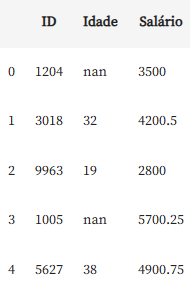  


```
import pandas as pd
import numpy as np

dados = pd.DataFrame({'ID': [1204, 3018, 9963, 1005, 5627],
                   'Idade': [np.nan, 32, 19, np.nan, 38],
                   'Salário': [3500.00, 4200.50, 2800.00, 5700.25, 4900.75]})
```

O highlight_null será aplicado no objeto Styler, e a cor de fundo dos elemento que tem dados nulos é alterada para laranja (#F79747).

```
s_nan = dados.style.format({'Idade':'{:.0f}','Salário':'{:,.2f}'})\
                   .highlight_null(color='#F79747')
s_nan
```

Para o highlight_between, podemos definir um limite superior e inferior para destacar um valor que esteja entre esses limites. No exemplo, o objetivo é destacar os valores na coluna Salário que estão entre 4 e 5 mil. O parâmetro left representa o limite inferior e o right o limite superior dos valores.

```
## Definir os limites superior e inferior
limite_superior = 5000.0
# O limite inferior é especificado através de uma Series que informa qual a coluna que terá a aplicação da função
limite_inferior = pd.Series([4000.0], index=['Salário'])

## Aplicar a estilização com highlight_between
s_bet = dados.style.format({'Idade':'{:.0f}','Salário':'{:,.2f}'})\
                   .highlight_between(left=limite_inferior, right=limite_superior,
                                      axis=1, color='#94B2D7')
s_bet
```

## PIVOT_TABLE E PIVOT
O Pandas fornece dois métodos que permitem transformar um DataFrame em outro formato, geralmente para fins de análise e visualização de dados, são eles o pivot_table e o pivot. A principal diferença entre os dois métodos está na maneira como os dados são agregados.

O método pivot_table permite transformar os dados com uma função de agregação para que sejam gerados resumos estatísticos, como a média, a soma, a contagem, etc. Por outro lado, o pivot apenas transforma um DataFrame sem uma função de agregação incluída, podendo ser comparado a uma transformação de formatos.

De modo geral, o pivot_table é mais útil quando você tem dados que precisam ser agregados de alguma forma antes de serem transformados. Ele permite especificar quais colunas devem ser usadas para agrupar os dados e quais colunas devem ser agregadas. Já o pivot é bastante usado para transformar dados de uma coluna em várias colunas.

Exemplo:  
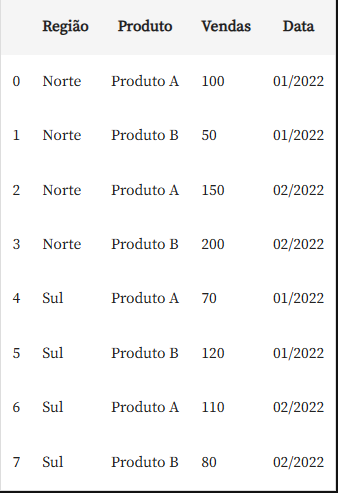

```
## Código para acompanhamento do exemplo

import pandas as pd

df = pd.DataFrame({
    'Região': ['Norte', 'Norte', 'Norte', 'Norte', 'Sul', 'Sul', 'Sul', 'Sul'],
    'Produto': ['Produto A', 'Produto B', 'Produto A', 'Produto B', 'Produto A', 'Produto B', 'Produto A', 'Produto B'],
    'Vendas': [100, 50, 150, 200, 70, 120, 110, 80],
    'Data': ['01/2022', '01/2022', '02/2022', '02/2022', '01/2022', '01/2022', '02/2022', '02/2022']
})
```

Com o método pivot_table, podemos calcular a média de vendas de cada produto em cada região:
```
df.pivot_table(values='Vendas', index='Região', columns='Produto', aggfunc='mean')
```


Já com o método pivot, podemos reorganizar os dados para que cada coluna seja uma combinação de Região, Produto e Data:
```
df.pivot(index=['Região', 'Produto'], columns='Data', values='Vendas')
```

Com isso, é possível notar que o pivot_table agregou os valores para cada combinação de Região e Produto, enquanto o pivot criou colunas separadas para cada combinação de Região, Produto e Data.

## TABELAS FORMAIS

As tabelas descritas como “formais” são também conhecidas como tabelas acadêmicas ou tabelas científicas. Essas tabelas são uma importante ferramenta de comunicação na apresentação de dados, pois são construídas para apresentar dados numéricos e/ou qualitativos de forma clara e concisa para auxiliar a pessoa leitora na compreensão dos resultados.

Durante o curso, será feita uma simplificação na estrutura da tabela formal, apenas alterando o layout de apresentação. No entanto, essas tabelas exigem uma atenção maior a sua construção, pois seguem algumas regras básicas de formatação, como a inclusão de um título descritivo, a definição das unidades de medida utilizadas, a formatação das células de dados e a inclusão de notas explicativas, quando necessário. Podemos seguir algumas dicas para a construção de tabelas científicas:

* Manter a simplicidade: as tabelas devem ser claras e fáceis de ler. Não inclua informações desnecessárias ou complicadas.
* Título claro e conciso: é preciso inserir um título na tabela, e ele deve ser claro e indicar claramente o conteúdo da tabela. Evite títulos genéricos, como "Dados" ou "Resultados".
* Legenda completa: inclua uma legenda que descreva todos os elementos da tabela, como abreviações, unidades de medida e símbolos.
Evitar células vazias: se possível, sempre preencha células com informações relevantes.
* Destaque dados importantes: busque destacar os dados importantes dentro da tabela, com alterações do plano de fundo ou do texto para negrito.
* Evite tabelas muito longas: tabelas muito longas podem ser difíceis de ler e podem ser divididas em várias tabelas menores, se possível.

Recomendação: https://www.amazon.com/Show-Me-Numbers-Designing-Enlighten/dp/0970601972

Pandas: https://pandas.pydata.org/docs/user_guide/style.html#

# DESAFIOS
https://drive.google.com/file/d/1_bWYYafYHYUY4Q-xabo34AvvzPtO9f5G/view?usp=sharing